In [4]:
from math import log

def computing_entropy(dataset):
    number_of_row = len(dataset)
    label_count = {}
    for row in dataset:
        label_content = row[-1]
        if label_content not in label_count.keys():
            label_count[label_content] = 0.0
        label_count[label_content] += 1.0
    ID3_entropy = 0.0
    for key in label_count:
        probability = float(label_count[key] / number_of_row)
        ID3_entropy -= probability * log(probability, 2)
    return ID3_entropy00
dataset = [[1,1,'yes'],
          [1,1,'yes'],
          [1,0,'no'],
          [0,1,'no'],
          [0,1,'no']]
print computing_entropy(dataset)

0.970950594455


In [7]:
def split_dataset(dataset,axis,value):
    result_dataset = []
    for row in dataset:
        if row[axis] == value:
            result_voctor = row[0:axis]
            result_voctor.extend(row[axis+1:])
            r+esult_dataset.append(result_voctor)
    
    return result_dataset
print split_dataset(dataset,1,1)

[[1, 'yes'], [1, 'yes'], [0, 'no'], [0, 'no']]


In [9]:
def choose_best_feature_to_split(dataset):
    choosened_feature = 0
    number_of_features = len(dataset[0]) - 1
    entropy_of_dataset = computing_entropy(dataset)
    best_Gain = 0.0
    
    for column in range(number_of_features):
        column_feature_value = [sample[column] for sample in dataset ]
        column_feature_value_set = set(column_feature_value)
        splitted_entropy = 0.0
        for value in column_feature_value_set:
            splitted_dataset = split_dataset(dataset,column, value)
            probability = len(splitted_dataset)/ float(len(dataset))
            splitted_entropy += probability * computing_entropy(splitted_dataset)
        infoGain = entropy_of_dataset - splitted_entropy
        if (infoGain > best_Gain):
            best_Gain = infoGain
            choosened_feature = column
    return choosened_feature

choose_best_feature_to_split(dataset)       

0

In [13]:
import operator
def choose_most_label(label_list):
    label_count = {}
    for item in label_list:
        if item not in label_count.keys():
            label_count[item] = 0.0
        label_count[item] += 1.0
    sorted_label_count = sorted(label_count.iteritems(),\
                             key=operator.itemgetter(1),reverse=True)
    return sorted_label_count[0][0]

#label_list = [1,2,2,2,2,3,3,3,3,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3]
#print choose_most_label(label_list)

3


In [46]:
def create_decision_tree(dataset, feature_name):
    class_list = [entry[-1] for entry in dataset]
    if class_list.count(class_list[0]) == len(class_list):
        return class_list[0]
    if len(dataset[0]) == 1:
        return choose_most_label(class_list)
    #decision_tree = {root : {}}
    choosen_feature_index = choose_best_feature_to_split(dataset)
    choosen_feature_name = feature_name[choosen_feature_index]
    decision_tree = {choosen_feature_name:{}}
    # del operate, need more cautions
    del(feature_name[choosen_feature_index])
    feature_value = [entry[choosen_feature_index] for entry in dataset]
    feature_value_set = set(feature_value)
    for value in feature_value_set:
        # need to understand whether to change paramters, this is much bug in function recurion call
        splitted_dataset = split_dataset(dataset, choosen_feature_index, value)
        feature_name_temp = feature_name[:]
        decision_tree[choosen_feature_name][value] = create_decision_tree(splitted_dataset,feature_name_temp)
        
    return decision_tree

feature_name = ["no surfacing",'flippers']
#trees = create_decision_tree(dataset, feature_name)
#print trees


{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [24]:
print feature_name

['flippers']


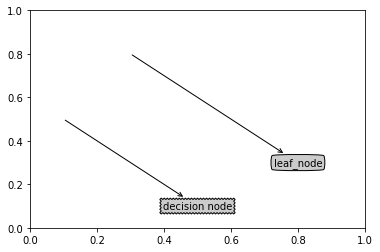

In [29]:
import matplotlib.pyplot as plt

#use map to discribe the attribute of node
decision_node = dict(boxstyle="sawtooth", fc="0.8")
leaf_node = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle="<-")

def plot_node(node_text, center_point, parent_point, note_type):
    create_plot.ax1.annotate(node_text, xy=parent_point,xycoords="axes fraction", xytext=center_point,\
                            textcoords="axes fraction",va="center", ha="center", bbox=note_type, \
                            arrowprops=arrow_args)
    
#def create_plot():
    #fig = plt.figure()
    #fig.clf()
    #create_plot.ax1 = plt.subplot(111)
    #plot_node('decision node',(0.5, 0.1),(0.1, 0.5), decision_node)
    #plot_node('leaf_node',(0.8, 0.3),(0.3, 0.8), leaf_node)
    #plt.show()
#create_plot()

In [47]:
def get_number_of_leaf_node(tree):
    
    num = 0
    first_key = tree.keys()[0]
    first_key_items = tree[first_key]
    for item in first_key_items.keys():
        if type(first_key_items[item]).__name__ == 'dict':
            num += get_number_of_leaf_node(first_key_items[item])
        else:
            num += 1
    return num

#decision_trees = create_decision_tree(dataset, feature_name)

#decision_tree = {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
#get_number_of_leaf_node(trees)

In [50]:
def get_deep_number_of_tree(tree):
    deep_num = 1
    max_deep_num = 1
    first_key = tree.keys()[0]
    first_key_items = tree[first_key]
    for item in first_key_items.keys():
        if type(first_key_items[item]).__name__ == 'dict':
            deep_num = 1 + get_deep_number_of_tree(first_key_items[item])
            if deep_num > max_deep_num:
                max_deep_num = deep_num
    return max_deep_num

#decision_tree = {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
#get_deep_number_of_tree(decision_tree)


2

In [54]:
'''
def plot_text(child_point, parent_point, content_of_arrow):
    x_of_text_content = (parent_point[0] - child_point[0]) / 2 + child_point[0]
    y_of_text_content = (parent_point[1] - child_point[1]) / 2 + child_point[1]
    create_plot.ax1.text(x_of_text_content,y_of_text_content, content_of_arrow)
'''

In [55]:
'''
def plot_tree(current_tree, parent_point,node_text):
    number_of_leafs = get_number_of_leaf_node(current_tree)
    number_of_depth = get_deep_number_of_tree(current_tree)
    first_string = current_tree.keys()[0]
    center_point = (plot_tree.xoff + (1.0 + float(number_of_leafs)) /2.0/plot_tree.totalW,\
                   plot_tree.yoff)
    plot_text(center_point,parent_point, node_text)
    plot_node(first_string,center_point, parent_point, decision_node)
    second_dict = current_tree[first_string]
    plot_tree.yoff = plot_tree.yoff  - 1.0 / plot_tree.totalD
    
    for key in second_dict.keys():
        if type(second_dict[key]).__name__ == 'dict':
            plot_tree(second_dict[key],center_point,str(key))
        else:
            plot_tree.xoff = plot_tree.xoff + 1.0 / plot_tree.totalW
            plot_node(second_dict[key],(plot_tree.xoff, plot_tree.yoff),center_point, leaf_node)
            plot_text(plot.xoff, plot_tree.yoff, center_point,str(key))
    plot_tree.yoff = plot_tree.yoff + 1.0 / plot_tree.totalD
    
'''

In [62]:
'''
def create_plot(tree):
    fig = plt.figure(1, facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    create_plot.ax1 = plt.subplot(111)
    plot_tree.total_width = float(get_number_of_leaf_node(tree))
    plot_tree.total_deep = float(get_deep_number_of_tree(tree))
    plot_tree.xoff = -0.5/plot_tree.total_width
    plot_tree.yoff = 1.0
    plot_tree(tree, (0.5, 1.0),'')
    plt.show()
'''

In [65]:
'''
decision_tree = {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}
create_plot(decision_tree)
'''

"\ndecision_tree = {'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}\ncreate_plot(decision_tree)\n"

In [87]:
def classify0(trained_tree, feature_label, test_data):
    root_name = trained_tree.keys()[0]
    root_name_index = feature_label.index(root_name)
    root_items = trained_tree[root_name]
    for key in root_items.keys():
        print 'key :   ', key, ' test_data[root_name_index] ====', test_data[root_name_index]
        if key == test_data[root_name_index]:
            if type(root_items[key]).__name__ == 'dict':
                result_class = classify0(root_items[key], feature_label, test_data)
            else:
                result_class = root_items[key]
    return result_class
#print decision_tree
feature_label = ['no surfacing','flippers']
print classify0(decision_tree, feature_label, [1,1])

key :    0  test_data[root_name_index] ==== 1
key :    1  test_data[root_name_index] ==== 1
key :    0  test_data[root_name_index] ==== 1
key :    1  test_data[root_name_index] ==== 1
yes


In [88]:
import pickle
def store_tree(decision_tree,filename):
    f = open(filename,'w')
    pickle.dump(decision_tree,f)
    f.close()

def get_tree_from_file(filename):
    f = open(filename,'r')
    return pickle.load(f)

store_tree(decision_tree,'decision_tree.txt')
    
    

In [89]:
print get_tree_from_file("decision_tree.txt")

{'no surfacing': {0: 'no', 1: {'flippers': {0: 'no', 1: 'yes'}}}}


In [93]:
glass_file = open('lenses.txt')
glass_data = [entity.strip().split('\t') for entity in glass_file.readlines()]
glass_label = ['age','prescript','astigmatic','tearRate']
glass_decision_tree = create_decision_tree(glass_data, glass_label)
print glass_decision_tree

{'tearRate': {'reduced': 'no lenses', 'normal': {'astigmatic': {'yes': {'prescript': {'hyper': {'age': {'pre': 'no lenses', 'presbyopic': 'no lenses', 'young': 'hard'}}, 'myope': 'hard'}}, 'no': {'age': {'pre': 'soft', 'presbyopic': {'prescript': {'hyper': 'soft', 'myope': 'no lenses'}}, 'young': 'soft'}}}}}}
